In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\data anallytics\US_Accidents_March23.csv")

df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:

df.info()
df.isnull().sum().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Description                5
Street                 10869
City                     253
County                     0
State                      0
Zipcode                 1915
Country                    0
Timezone                7808
Airport_Code           22635
Weather_Timestamp     120228
dtype: int64

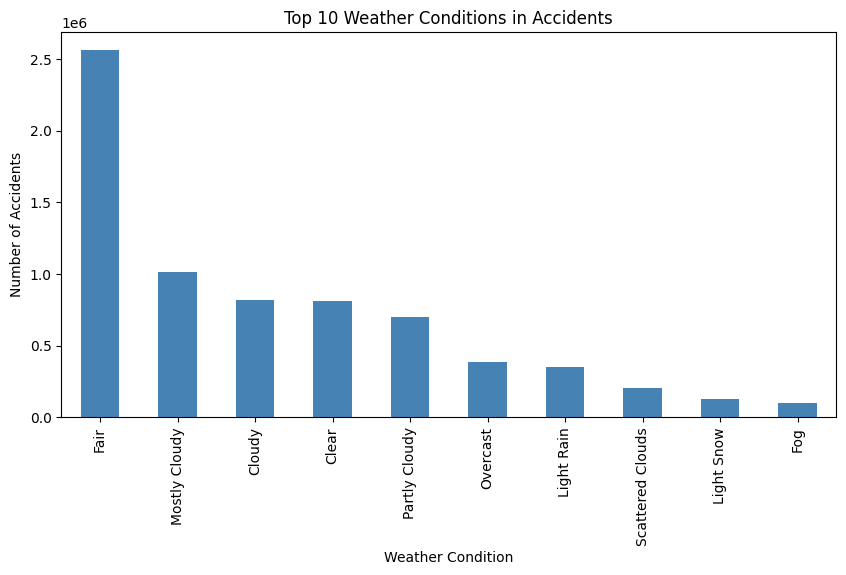

In [5]:
plt.figure(figsize=(10,5))
df["Weather_Condition"].value_counts().head(10).plot(kind="bar", color="steelblue")
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()


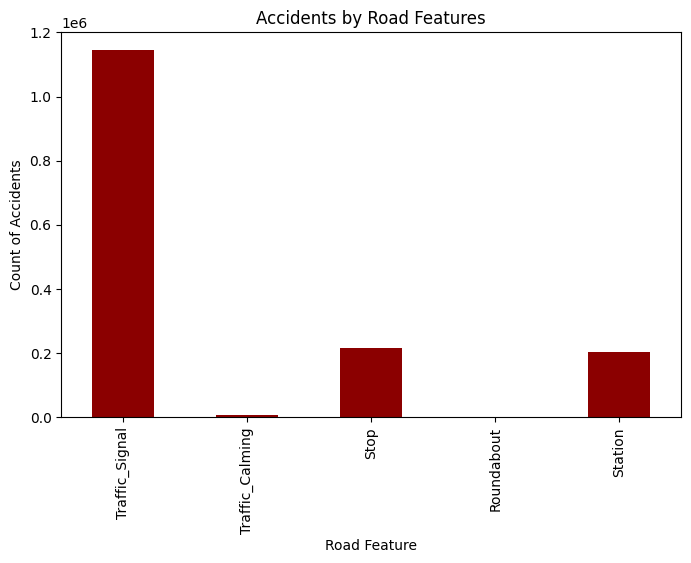

In [6]:
road_cols = ["Traffic_Signal", "Traffic_Calming", "Stop", "Roundabout", "Station"]

plt.figure(figsize=(8,5))
df[road_cols].sum().plot(kind="bar", color="darkred")
plt.title("Accidents by Road Features")
plt.xlabel("Road Feature")
plt.ylabel("Count of Accidents")
plt.show()


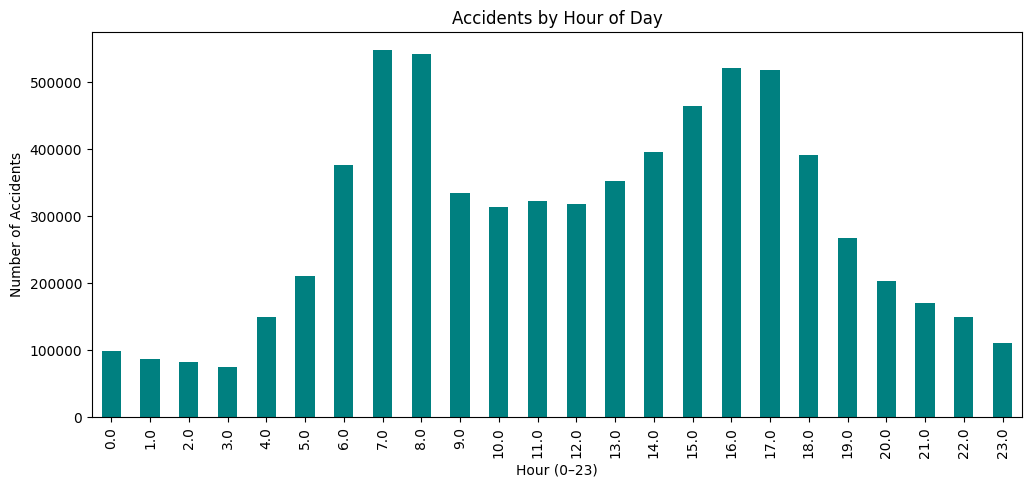

In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"] = df["Start_Time"].dt.hour

plt.figure(figsize=(12,5))
df["Hour"].value_counts().sort_index().plot(kind="bar", color="teal")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Accidents")
plt.show()


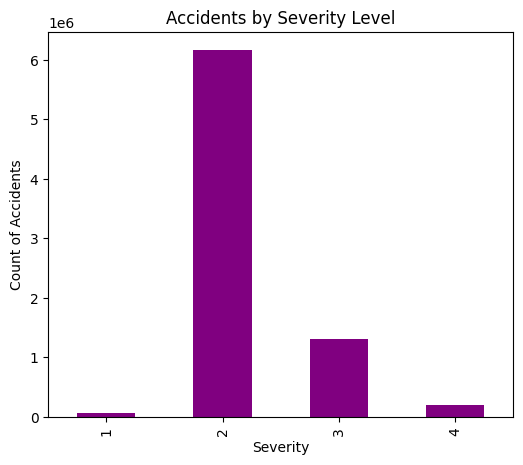

In [8]:
plt.figure(figsize=(6,5))
df["Severity"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Accidents by Severity Level")
plt.xlabel("Severity")
plt.ylabel("Count of Accidents")
plt.show()


In [9]:
m = folium.Map(location=[df["Start_Lat"].mean(), df["Start_Lng"].mean()], zoom_start=6)
heat_data = df[["Start_Lat", "Start_Lng"]].dropna().values.tolist()
HeatMap(heat_data[:5000]).add_to(m)  # limit to 5000 points for speed
m
